In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/content/education_level_region.csv')

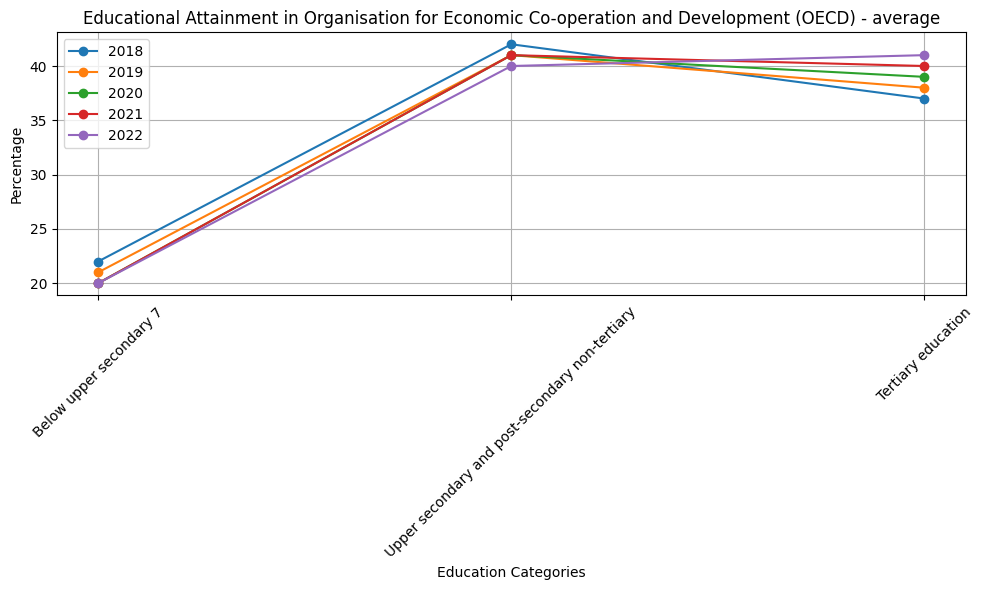

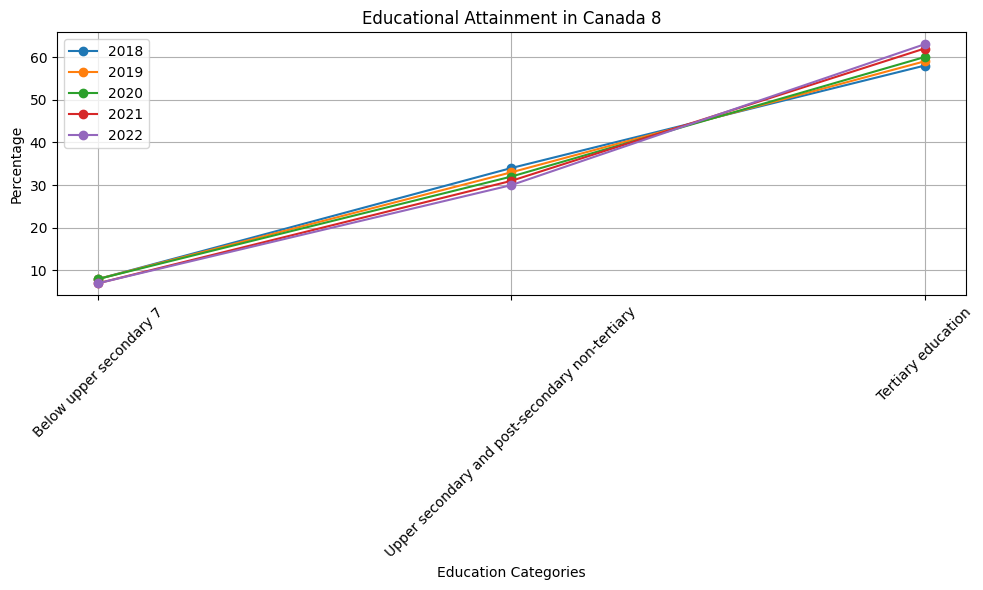

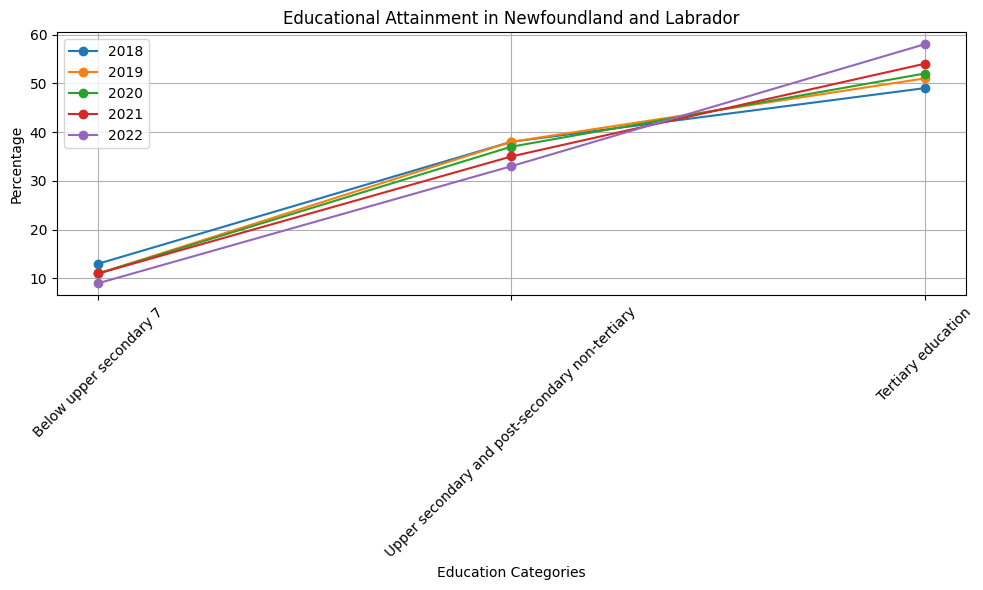

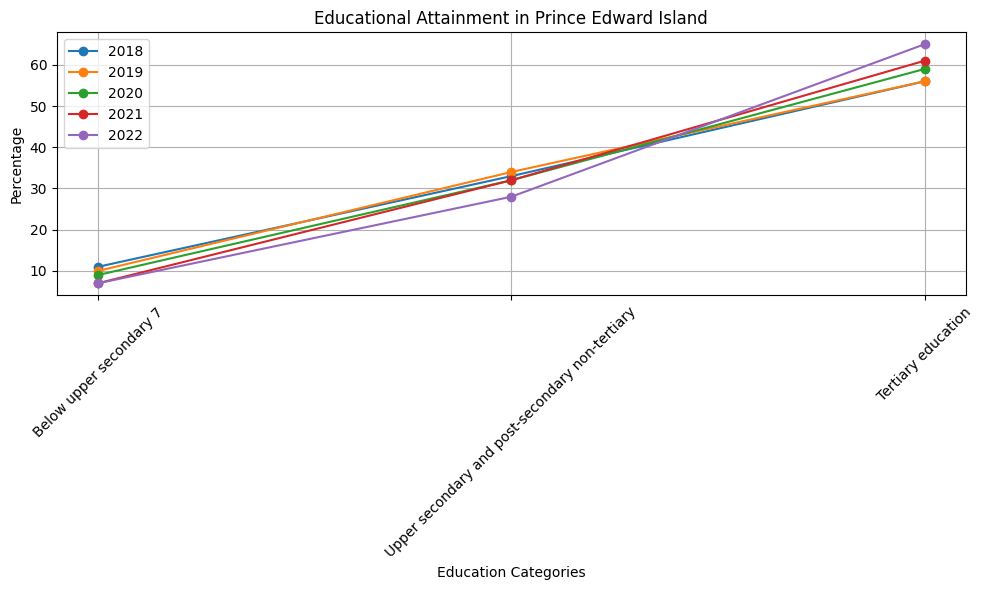

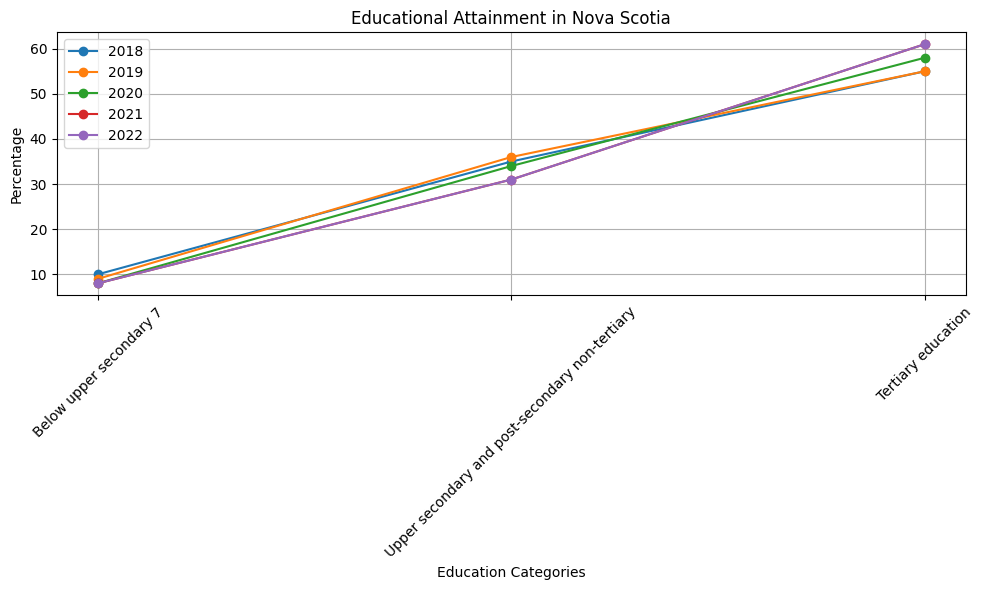

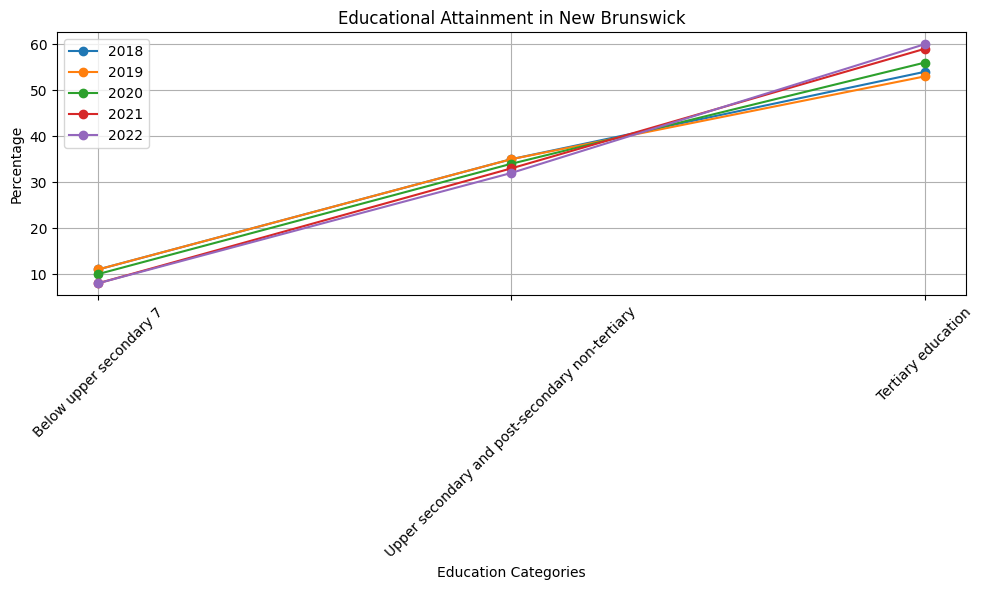

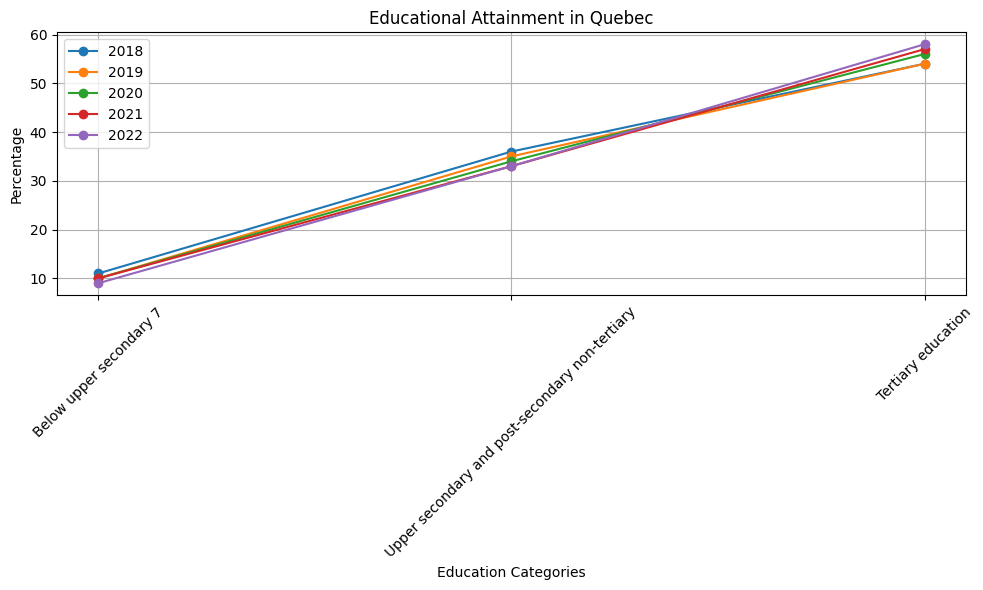

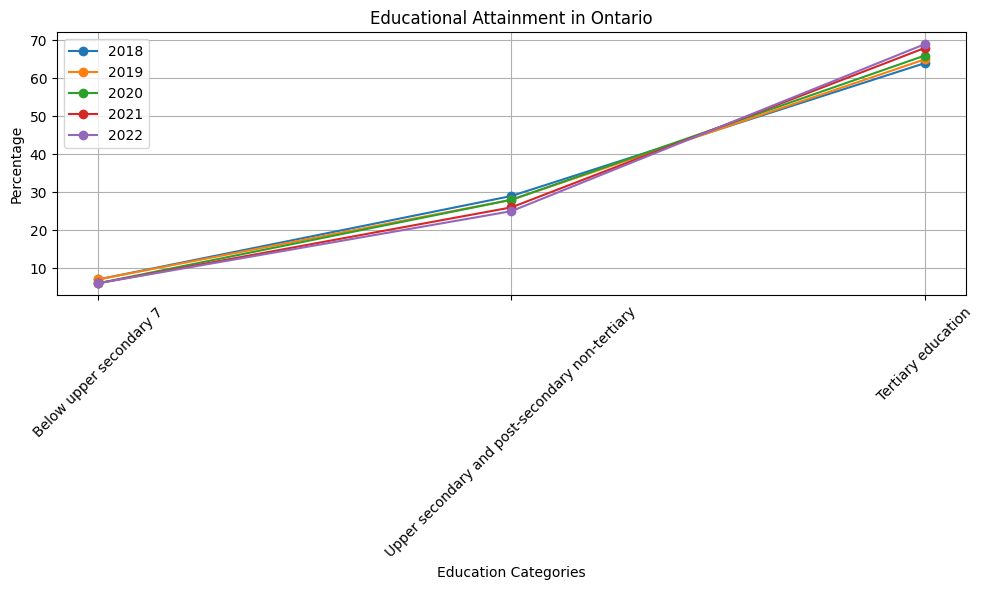

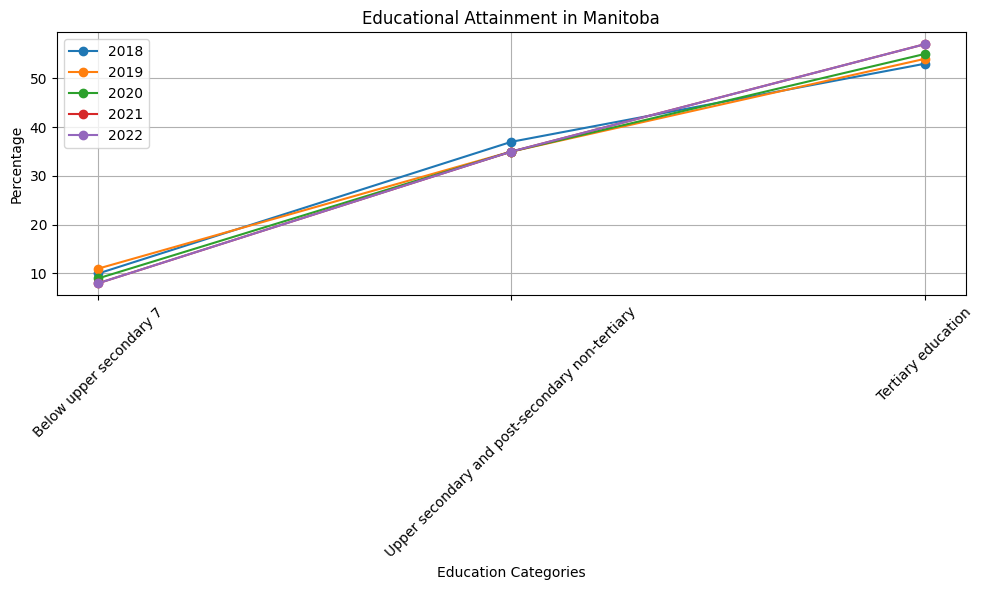

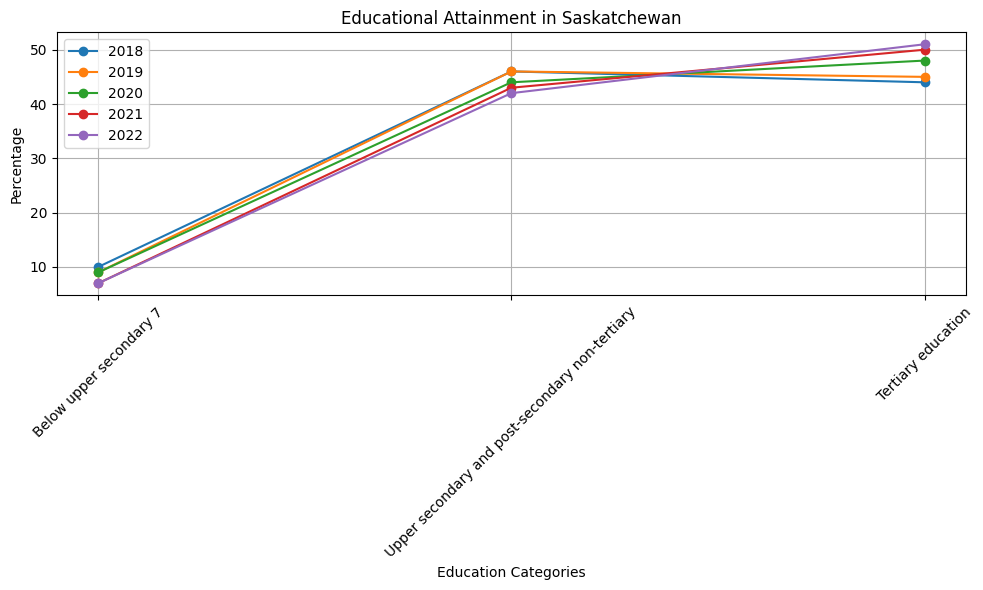

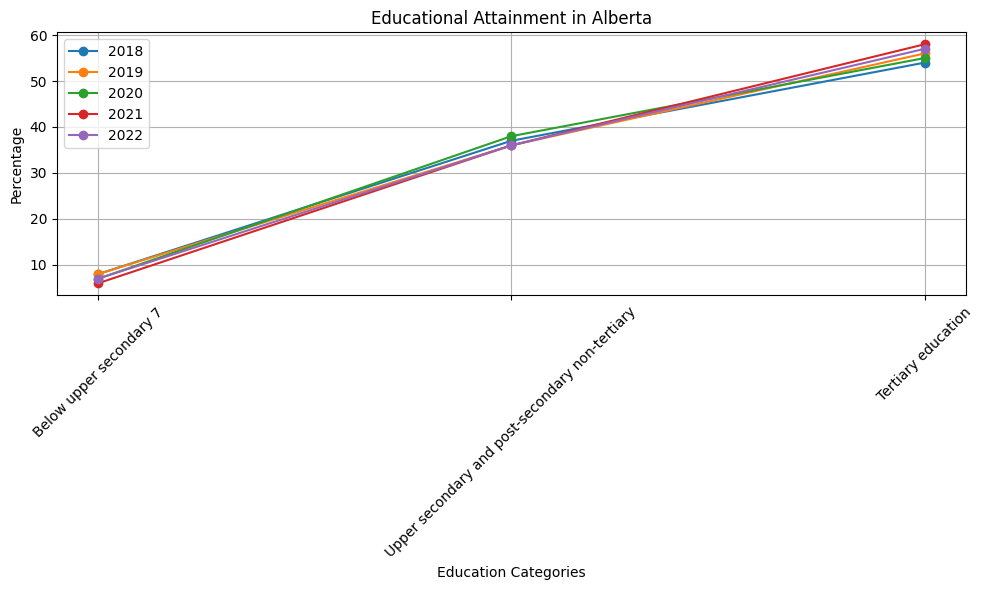

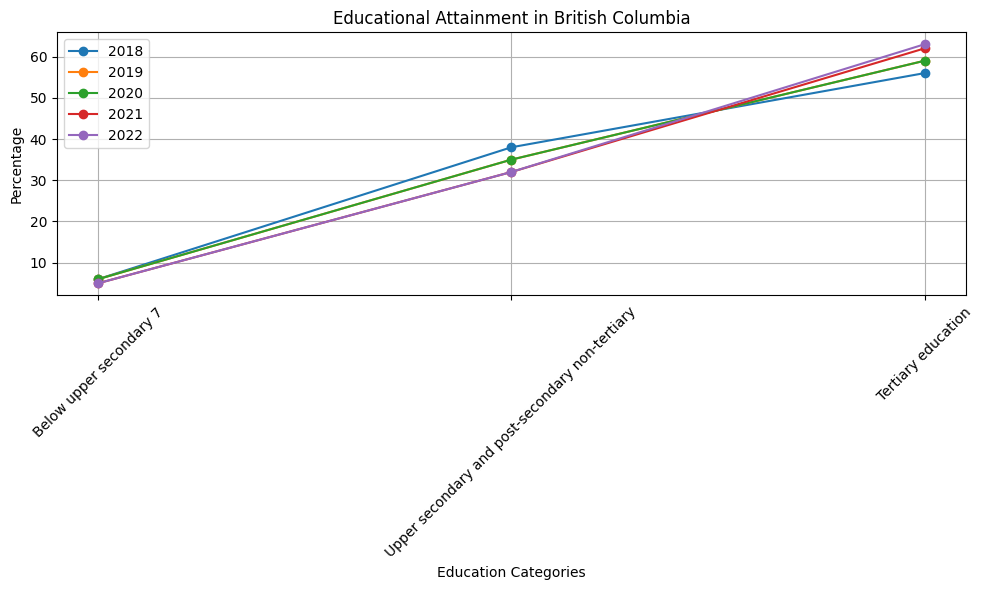

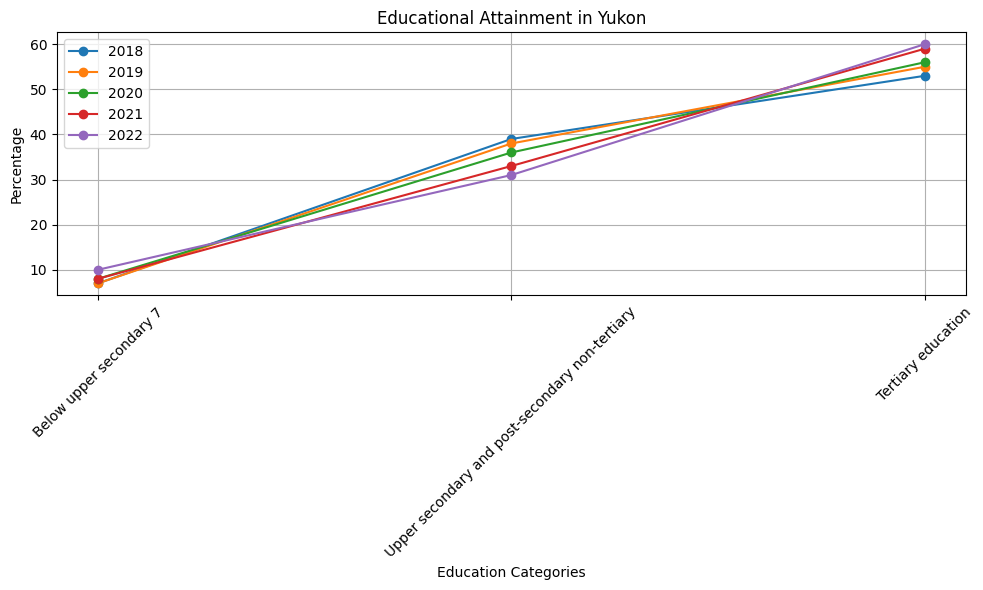

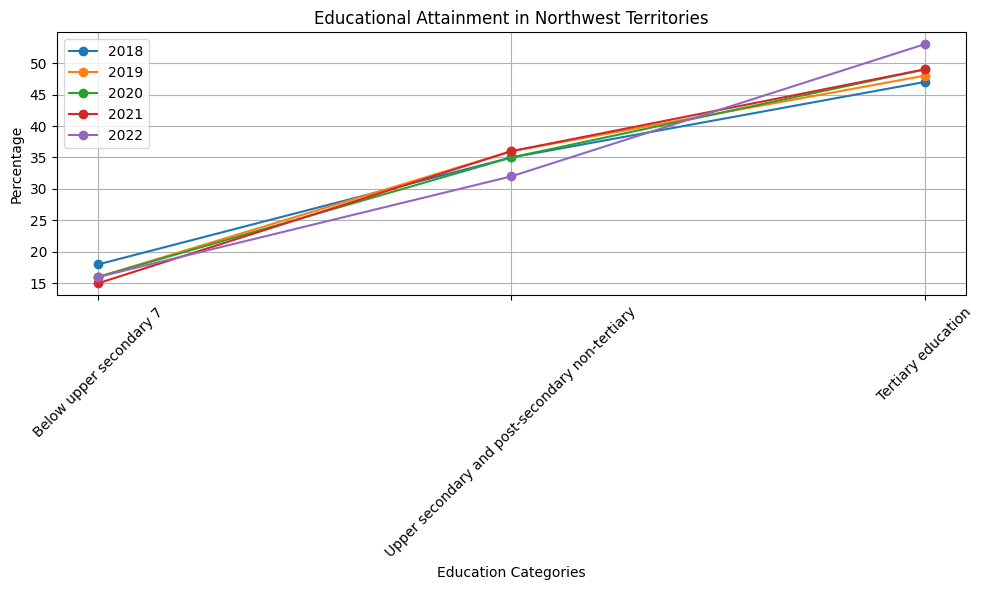

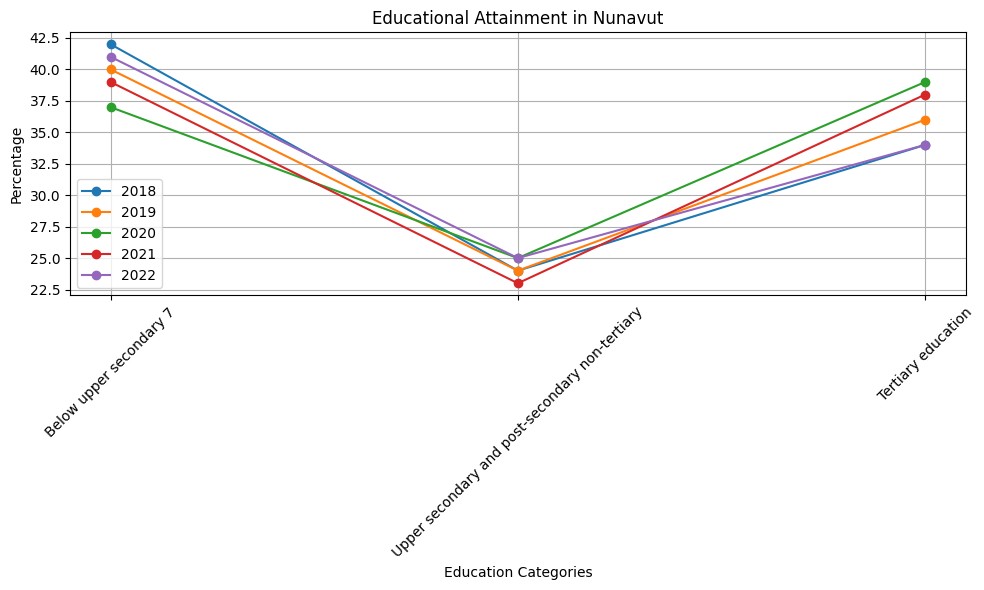

In [7]:
# Filter the data for each state and plot the graphs
for state in df['Geography'].unique():
    state_data = df[df['Geography'] == state]

    # Extract education categories and years' data
    categories = ['Below upper secondary 7', 'Upper secondary and post-secondary non-tertiary', 'Tertiary education']
    years = ['2018', '2019', '2020', '2021', '2022']

    # Prepare data for plotting
    data = {year: [state_data[state_data['Educational attainment level'] == category][year].values.tolist()[0] if not state_data[state_data['Educational attainment level'] == category][year].empty else None for category in categories] for year in years}

    # Plot graph
    plt.figure(figsize=(10, 6))
    for year in years:
        # Check if all categories have data for this year
        if all(data[year]):
            plt.plot(categories, data[year], marker='o', label=year)
    plt.title(f'Educational Attainment in {state}')
    plt.xlabel('Education Categories')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [8]:
import plotly.graph_objs as go

# Filter the data for each state and plot the graphs
for state in df['Geography'].unique():
    state_data = df[df['Geography'] == state]

    # Extract education categories and years' data
    categories = ['Below upper secondary 7', 'Upper secondary and post-secondary non-tertiary', 'Tertiary education']
    years = ['2018', '2019', '2020', '2021', '2022']

    # Prepare data for plotting
    data = {year: [state_data[state_data['Educational attainment level'] == category][year].values.tolist()[0] if not state_data[state_data['Educational attainment level'] == category][year].empty else None for category in categories] for year in years}

    # Create traces for each year
    traces = []
    for year in years:
        # Check if all categories have data for this year
        if all(data[year]):
            trace = go.Scatter(x=categories, y=data[year], mode='lines+markers', name=year)
            traces.append(trace)

    # Create layout
    layout = go.Layout(
        title=f'Educational Attainment in {state}',
        xaxis=dict(title='Education Categories'),
        yaxis=dict(title='Percentage'),
        legend=dict(orientation='h', x=0.1, y=-0.2)
    )

    # Create figure
    fig = go.Figure(data=traces, layout=layout)

    # Show interactive plot
    fig.show()
